IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

d:\GitHub\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
df_1=df_1.drop_duplicates()
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...    amp2(C13)  \
0            96.0    3.596543    3.414090 -0.014483  ...  1316

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       9.0 -0.140564   0.034097   -0.830830   0.231863         96.0   
1      49.0 -0.011966   0.011914    2.115195   0.109671         61.0   
2      18.0 -0.058751   0.005900    0.053088   0.096622          0.0   
3       8.0 -0.061184   0.012261    0.150358   0.126372          0.0   
4      21.0 -0.044291   0.018848   -0.843425   0.144079         75.0   
...     ...       ...        ...         ...        ...          ...   
1344   13.0  0.000691   0.011144    3.110887   0.105421         57.0   
1345   90.0 -0.052962   0.016283   -0.519982   0.138026        111.0   
1346   77.0 -0.010955   0.057471    1.930516   0.239701         86.0   
1347    3.0 -0.055331   0.029124   -1.068760   0.179175          0.0   
1348   24.0 -0.135223   0.041943   -1.550853   0.245185         76.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...    amp2(C13)  \
0             0.0    9.892668    5.240082  0.013242  ...   941

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.140564   0.034097   -0.830830   0.231863         96.0          0.0   
1    -0.011966   0.011914    2.115195   0.109671         61.0         84.0   
2    -0.058751   0.005900    0.053088   0.096622          0.0         97.0   
3    -0.061184   0.012261    0.150358   0.126372          0.0         62.0   
4    -0.044291   0.018848   -0.843425   0.144079         75.0         56.0   
...        ...        ...         ...        ...          ...          ...   
1344  0.000691   0.011144    3.110887   0.105421         57.0         79.0   
1345 -0.052962   0.016283   -0.519982   0.138026        111.0        115.0   
1346 -0.010955   0.057471    1.930516   0.239701         86.0         85.0   
1347 -0.055331   0.029124   -1.068760   0.179175          0.0         95.0   
1348 -0.135223   0.041943   -1.550853   0.245185         76.0         94.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...    amp2(

In [7]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index([], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(C13)', '<>(C14)', 'var(C14)', 'kurt(C14)', 'RMS(C14)',
       'freq1(C14)', 'freq2(C14)', 'amp1(C14)', 'amp2(C14)', 'Guasto'],
      dtype='object', length=121)


In [8]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340 -0.008867    0.01178    2.300769   0.108758         59.0         58.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...   amp2(C13)     <>(C14)  \
340    5.875873    2.663948  0.062181   0.011045  ...  858.985023  1569.45641   

        var(C14)  kurt(C14)     RMS(C14)  freq1(C14)  freq2(C14)    amp1(C14)  \
340  7696.649766   0.012741  1571.900232       100.0        94.0  1741.131461   

       amp2(C14)  Guasto  
340  1066.741429       1  

[1 rows x 121 columns]


In [9]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [10]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.140564   0.034097   -0.830830   0.231863         96.0          0.0   
1    -0.011966   0.011914    2.115195   0.109671         61.0         84.0   
2    -0.058751   0.005900    0.053088   0.096622          0.0         97.0   
3    -0.061184   0.012261    0.150358   0.126372          0.0         62.0   
4    -0.044291   0.018848   -0.843425   0.144079         75.0         56.0   
...        ...        ...         ...        ...          ...          ...   
1344  0.000691   0.011144    3.110887   0.105421         57.0         79.0   
1345 -0.052962   0.016283   -0.519982   0.138026        111.0        115.0   
1346 -0.010955   0.057471    1.930516   0.239701         86.0         85.0   
1347 -0.055331   0.029124   -1.068760   0.179175          0.0         95.0   
1348 -0.135223   0.041943   -1.550853   0.245185         76.0         94.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...    amp2(

### Bilanciamento del dataset

In [11]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [12]:
'''oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)'''

'oversample = SMOTE()\nx, y = oversample.fit_resample(x,y)\nprint(x)'

# Selezione feature più importanti

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=15)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=15, score_func=<function f_regression at 0x00000278FAFCFCE0>)
[False False False False False False False False  True  True False  True
  True False  True False False False False False False False  True False
 False False False False  True False  True False  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True False False False False
 False False False False False False False False False False False False
 False False  True False False False False  True False False False False
 False False  True False False False False False False False False False]


In [14]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

    Input_Features   F_Score
34      kurt(AccY)  4.507736
28     freq1(AccX)  3.143836
12     freq1(GyrY)  3.077634
78        amp1(C9)  2.783597
11       RMS(GyrY)  2.329279
9        var(GyrY)  2.176921
14      amp1(GyrY)  2.024709
8         <>(GyrY)  1.974511
32        <>(AccY)  1.812040
79        amp2(C9)  1.803380
22      amp1(GyrZ)  1.469881
103      amp2(C12)  1.407500
110      amp1(C13)  1.302516
98       kurt(C12)  1.284045
30      amp1(AccX)  1.251864
19       RMS(GyrZ)  1.167166
86       amp1(C10)  1.093973
62     amp1(Pitch)  1.035412
17       var(GyrZ)  0.922305
111      amp2(C13)  0.845801
118      amp1(C14)  0.795257
113       var(C14)  0.759443
87       amp2(C10)  0.740606
4      freq1(GyrX)  0.622922
57      var(Pitch)  0.604858
15      amp2(GyrY)  0.554208
35       RMS(AccY)  0.495593
0         <>(GyrX)  0.448056
59      RMS(Pitch)  0.310765
94       amp1(C11)  0.258905
81        var(C10)  0.242053
102      amp1(C12)  0.228522
46      amp1(AccZ)  0.200630
74        kurt

In [15]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[0, 1, 2, 3, 4, 5, 6, 7, 10, 13, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119]


In [16]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  amp1(GyrZ)  \
0     0.013242   0.004018   0.064668         94.0    1.398370    2.232383   
1     0.060120   0.010975   0.120672         98.0    3.796026    0.853072   
2     0.032410   0.003681   0.068709        104.0    3.885123    5.191867   
3     0.021044   0.005929   0.079718         68.0    1.725382    3.951339   
4     0.014095   0.003180   0.058055         65.0    2.762247    0.449760   
...        ...        ...        ...          ...         ...         ...   
1344  0.066237   0.011513   0.125972         73.0    1.715159    1.781161   
1345  0.010212   0.025180   0.158830          0.0   13.759030    1.660373   
1346 -0.040528   0.035112   0.191500          0.0   22.510671    0.803356   
1347 -0.010890   0.007514   0.087244         68.0    3.256480    0.717041   
1348  0.027306   0.009226   0.099737         92.0    7.665099    0.317995   

      freq1(AccX)  amp1(AccX)  <>(AccY)  kurt(AccY)     amp1(C9)     amp2(C

In [17]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  amp1(GyrZ)  \
340  0.062181   0.011045   0.121995         99.0    2.462377     0.87806   

     freq1(AccX)  amp1(AccX)  <>(AccY)  kurt(AccY)     amp1(C9)    amp2(C9)  \
340        126.0    8.202132  0.177354     0.05571  1069.011419  716.671323   

     kurt(C12)   amp2(C12)    amp1(C13)  
340   1.138946  923.555864  1519.428813  


In [18]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      <>(GyrY)  amp1(GyrZ)  kurt(C12)    amp2(C12)
0     0.013242    2.232383   1.841328   391.015050
1     0.060120    0.853072   1.143547   861.762118
2     0.032410    5.191867  -0.723678   876.191578
3     0.021044    3.951339   0.904764   560.865238
4     0.014095    0.449760   0.237883   423.188234
...        ...         ...        ...          ...
1344  0.066237    1.781161   1.269736   702.048623
1345  0.010212    1.660373  -0.786471  1190.213784
1346 -0.040528    0.803356  -0.504123   863.998108
1347 -0.010890    0.717041   0.815592  1056.578667
1348  0.027306    0.317995   2.141266   910.017166

[1348 rows x 4 columns]


In [19]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     <>(GyrY)  amp1(GyrZ)  kurt(C12)   amp2(C12)
340  0.062181     0.87806   1.138946  923.555864


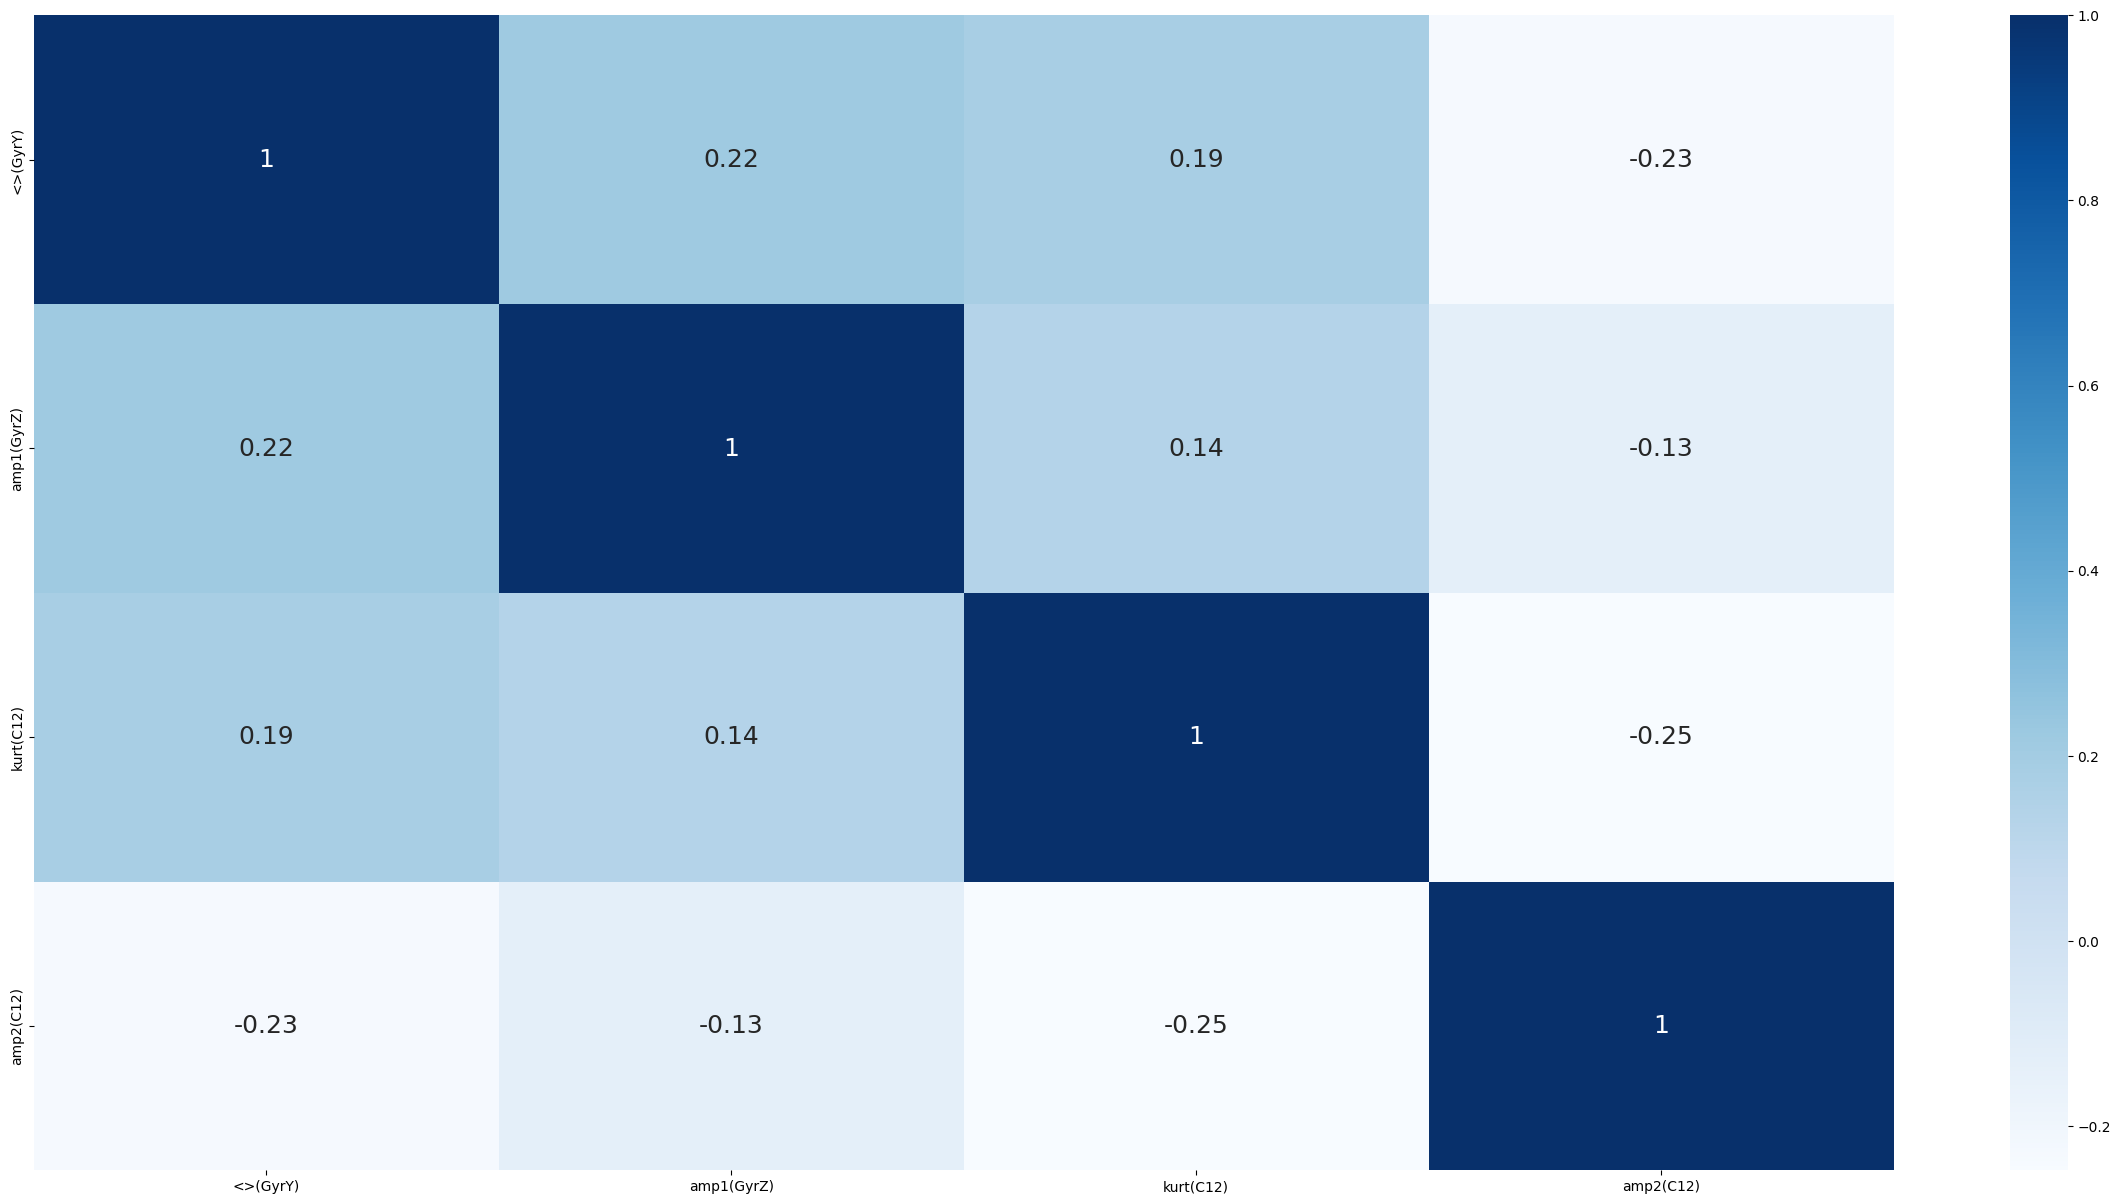

In [20]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [21]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1078, 4)
(270, 4)
(1078, 1)
(270, 1)


In [22]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs, criterion="entropy",max_depth=3),
    RandomForestClassifier(n_estimators = 1000,max_depth=1, random_state=rs,bootstrap=False),
    GradientBoostingClassifier(random_state= rs),
    AdaBoostClassifier(n_estimators=10, random_state= rs),
    LinearDiscriminantAnalysis(),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

Cross-Validation: [0.73148148 0.76388889 0.75462963 0.73953488 0.77209302]
Accuracy: 0.72 	 ---> LogisticRegression 
Test: 1    1
Name: Guasto_test, dtype: int64


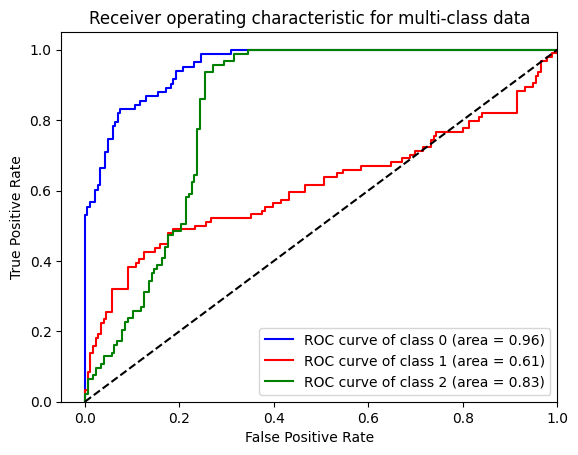

----------------------------------------------------
Cross-Validation: [0.88425926 0.88425926 0.8287037  0.8744186  0.8744186 ]
Accuracy: 0.86 	 ---> DecisionTreeClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64


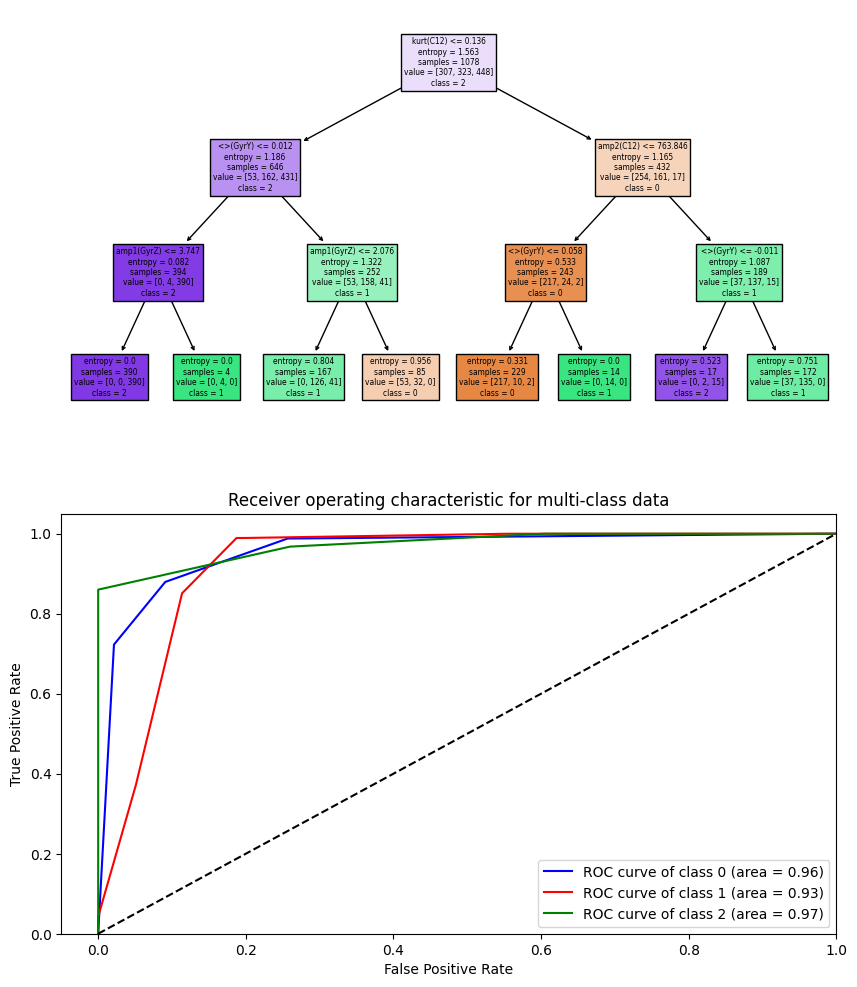

----------------------------------------------------
Cross-Validation: [0.6712963  0.73148148 0.68518519 0.7255814  0.72093023]
Accuracy: 0.71 	 ---> RandomForestClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64


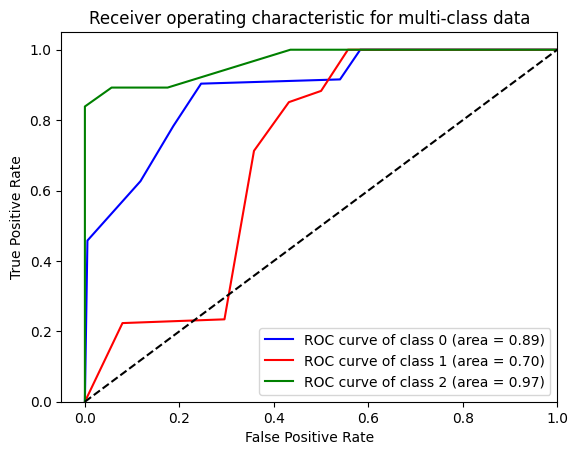

----------------------------------------------------
Cross-Validation: [1.         0.99074074 0.99537037 0.98604651 1.        ]
Accuracy: 1.0 	 ---> GradientBoostingClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64


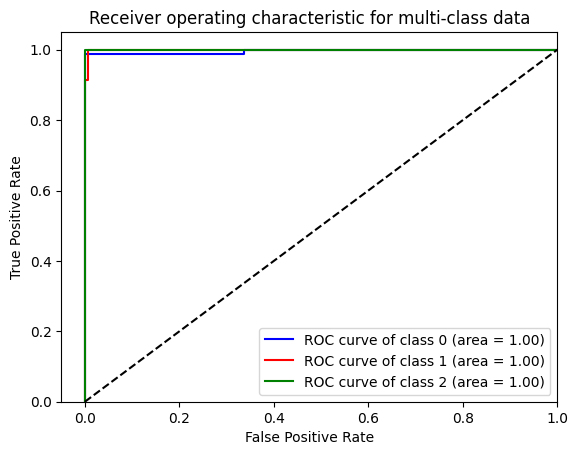

----------------------------------------------------
Cross-Validation: [0.71759259 0.77777778 0.75925926 0.76744186 0.82325581]
Accuracy: 0.77 	 ---> AdaBoostClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64


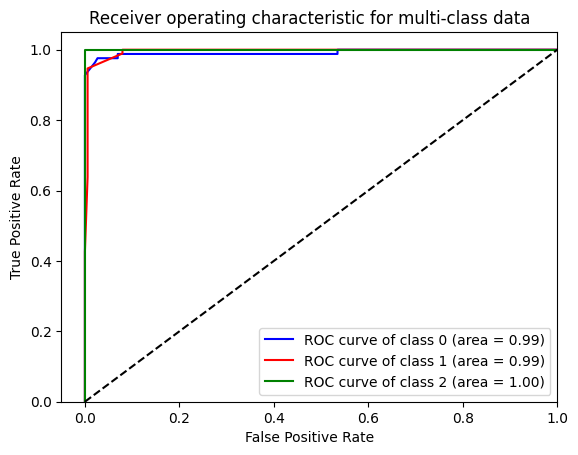

----------------------------------------------------
Cross-Validation: [0.77314815 0.82407407 0.80092593 0.77209302 0.76744186]
Accuracy: 0.76 	 ---> LinearDiscriminantAnalysis 
Test: 1    1
Name: Guasto_test, dtype: int64


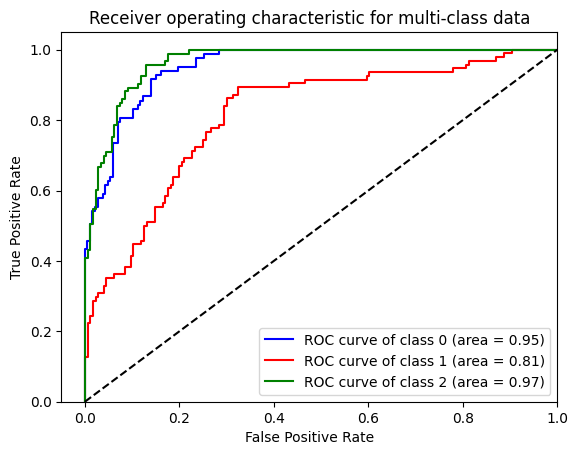

----------------------------------------------------
Cross-Validation: [0.60185185 0.59722222 0.60185185 0.59534884 0.61395349]
Accuracy: 0.54 	 ---> SVC 
Test: 2    1
Name: Guasto_test, dtype: int64


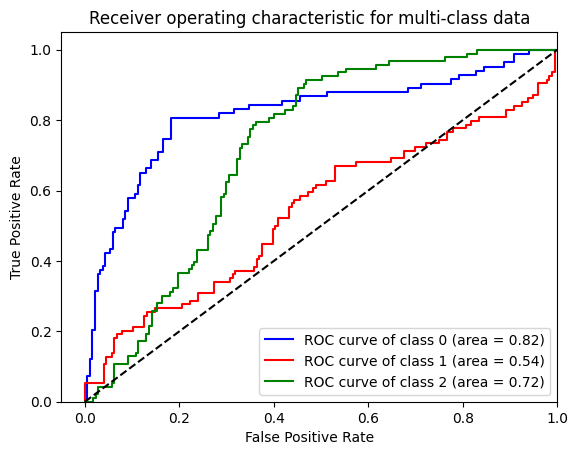

----------------------------------------------------
Cross-Validation: [0.62962963 0.72685185 0.74074074 0.72093023 0.7255814 ]
Accuracy: 0.64 	 ---> MLPClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64


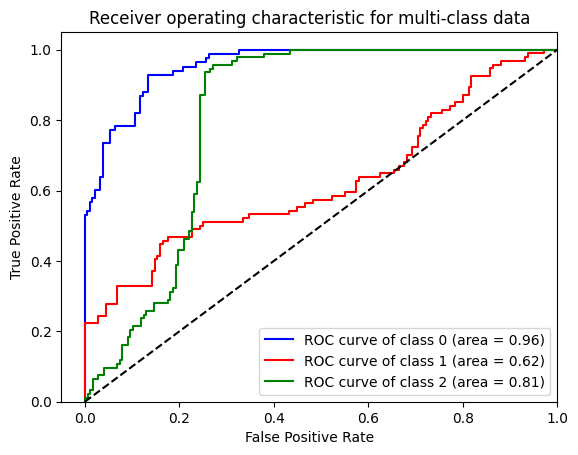

----------------------------------------------------
Cross-Validation: [0.30092593 0.28703704 0.28240741 0.29767442 0.28372093]
Accuracy: 0.35 	 ---> SGDClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64


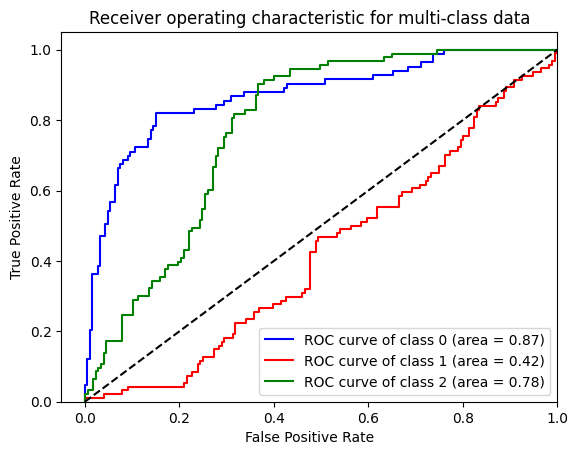

----------------------------------------------------


In [23]:
from itertools import cycle
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

n_classes = 3

j=0
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    #fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)

    if (j == 1):
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)
        figure, axis = plt.subplots(2, 1,figsize=(10,12))
        tree.plot_tree(clf,feature_names=x_train.columns.values,class_names=['0','1','2'],ax=axis[0],filled=True)
    elif(j == 2) |(j == 7):
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)
    else:
        clf = OneVsRestClassifier(clf)
        y_score = clf.fit(x_train, y_train).decision_function(x_test)

       

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    j += 1

    print("----------------------------------------------------")

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


### Matrici di confusione

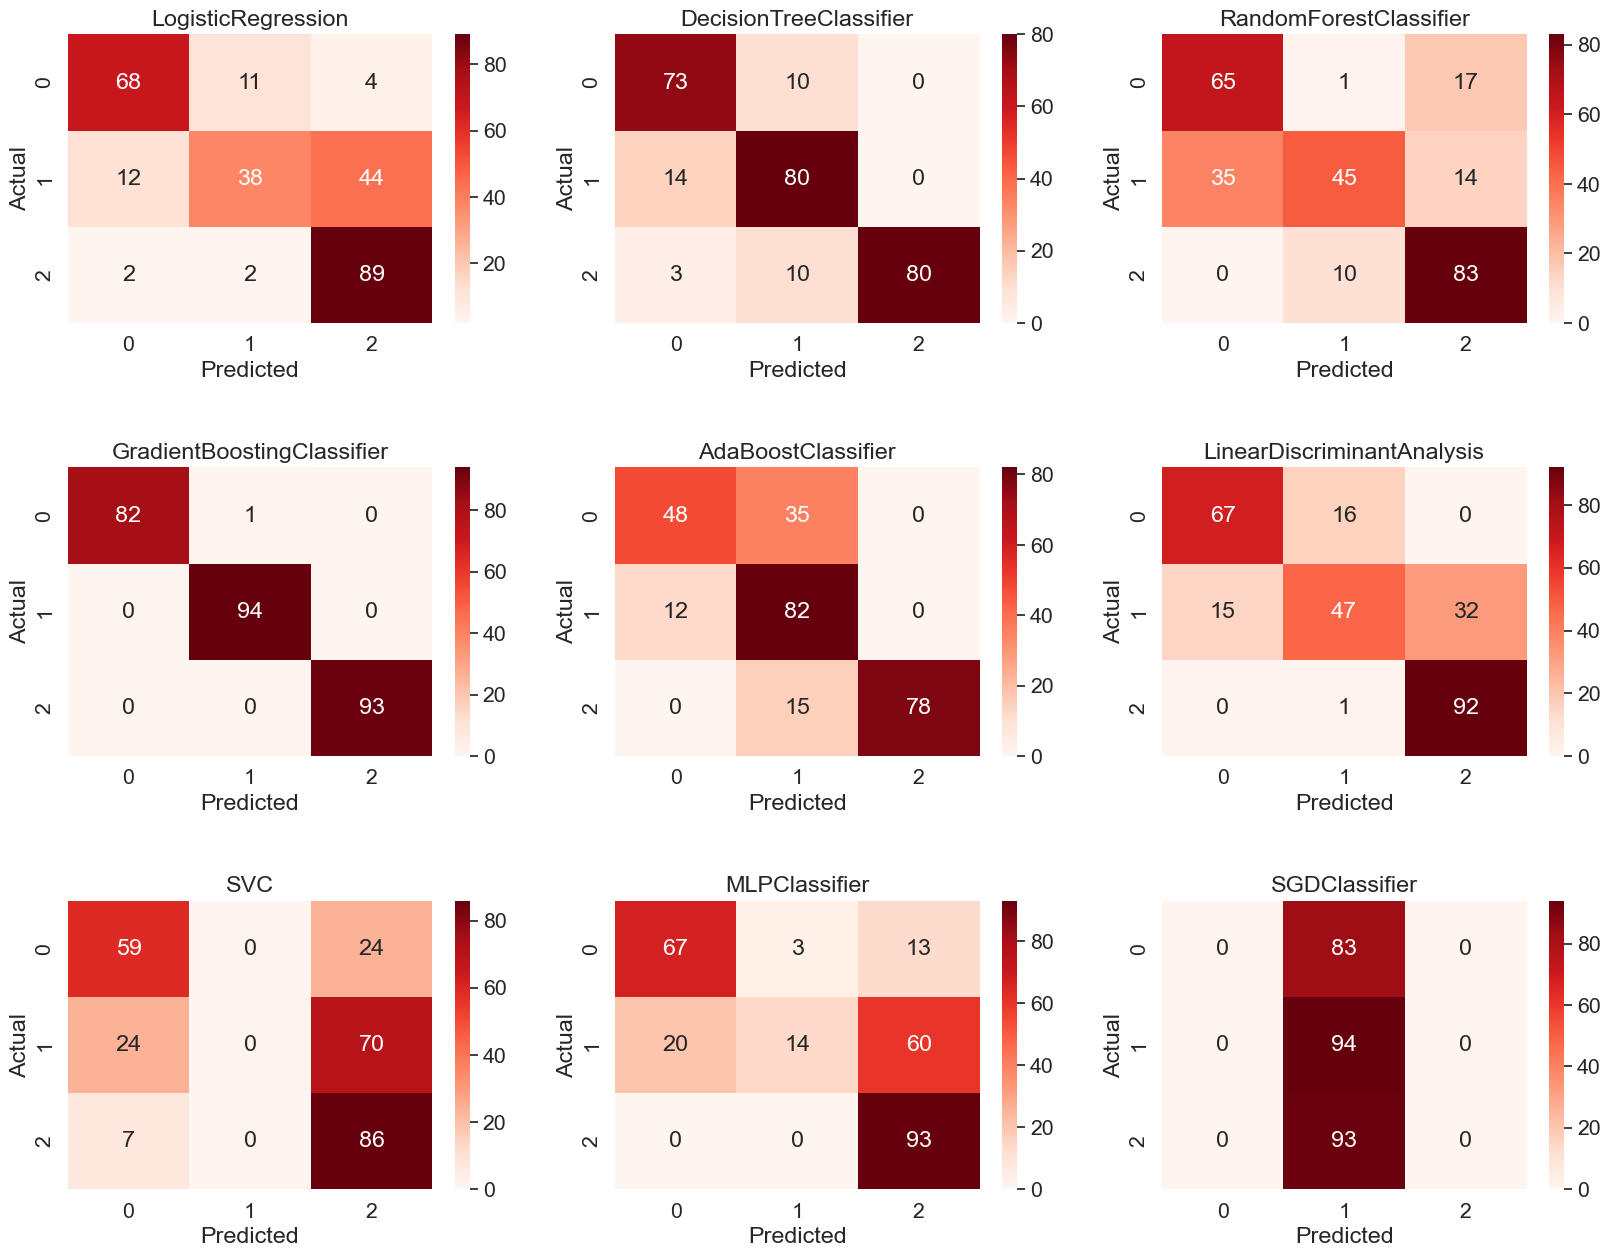

In [24]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation Scores

Text(0.5, 1.0, 'Cross validation scores')

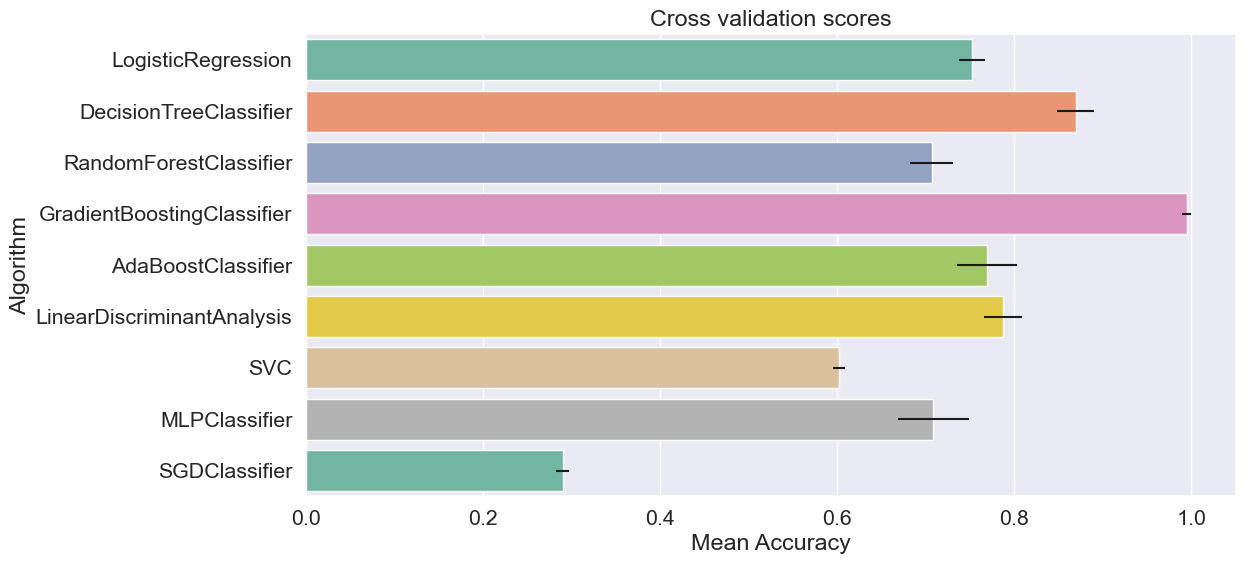

In [25]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [26]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        83
           1       0.75      0.40      0.52        94
           2       0.65      0.96      0.77        93

    accuracy                           0.72       270
   macro avg       0.74      0.73      0.71       270
weighted avg       0.74      0.72      0.70       270

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        83
           1       0.80      0.85      0.82        94
           2       1.00      0.86      0.92        93

    accuracy                           0.86       270
   macro avg       0.87      0.86      0.86       270
weighted avg       0.87      0.86      0.87       270

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.78      0.71      